# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [14]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = np.array(Image.open('img/son.png'))
sonrot = np.array(Image.open('img/sonrot.png'))

## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [15]:
def computeFT(I):
    return np.fft.fft2(I)
    """ Array -> Array[complex] """

def toVisualizeFT(If):
    return np.fft.fftshift(np.abs(If))
    """ Array[complex] -> Array[float] """

def toVisualizeLogFT(If):
    return np.log(1+np.fft.fftshift(np.abs(If)))
    """ Array[complex] -> Array[float] """

2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

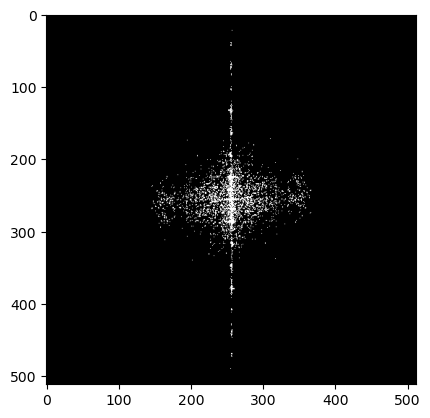

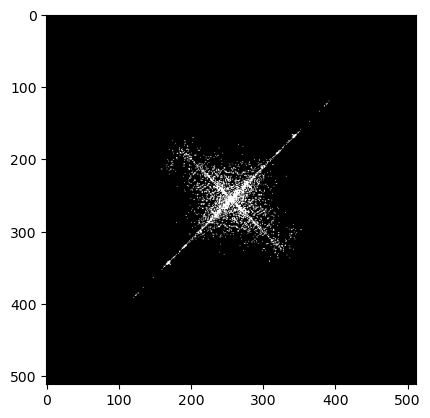

In [17]:
import matplotlib.pyplot as plt

# threshold function
def thresholdImage(I,s):
    """ Array*int -> Array """
    return (I>=s)*255
    
plt.gray()

# your code below

# compute FT
ftson=computeFT(son)
ftsonrot=computeFT(sonrot)

# compute the module
moduleftson=toVisualizeFT(ftson)
moduleftsonrot=toVisualizeFT(ftsonrot)

# threshold and display the spectrum
plt.imshow(thresholdImage(moduleftson,10**5))
plt.show()
plt.imshow(thresholdImage(moduleftsonrot,10**5))
plt.show()


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

In [21]:
In Q2 we can see that the Fourier Transform represents the density of the frequencies. In the first image the spectrum
is vertical which shows that the image is vertical. The second one has a gradient, showing that the image itsself is rotated.
Also, regarding the frequencies, we can see that in one axe, in both spectrums, the line in longer suggesting that the
length of each line is somewhat similar and does not change a lot. In the other axe, the frequencies have a wider spectrum,
suggesting that the length of the words of each line have completely different sizes, thus we have more seperate dots
corresponding to different frequencies.

SyntaxError: invalid syntax (3958761520.py, line 1)

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [18]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1+(1-alpha)*I2


5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

<function matplotlib.pyplot.show(close=None, block=None)>

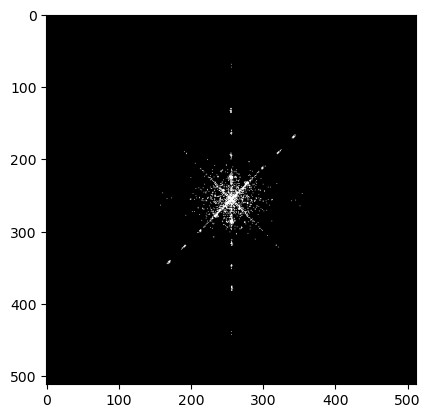

In [20]:
#apply previous function
result = blend(son,sonrot,1/2)

# compute the fourier transform
ft_result = computeFT(result)

# compute the module
module_ft_result = toVisualizeFT(ft_result) 

#visualize the result
plt.imshow(thresholdImage(module_ft_result, 10**5)) 
plt.show

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

In [ ]:
In this superimposed graph of the spectrum we can see the linearity property of the fourier transform, since we can see
both lines of the vertical and the rotated image spectrums. Also the intensity now varies since the graph has the 
superposition of the two spectrums.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

C:\Users\conmy\AppData\Local\Temp\ipykernel_43776\3893800666.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Iori[i-1, j-1] = imax[0]


<function matplotlib.pyplot.show(close=None, block=None)>

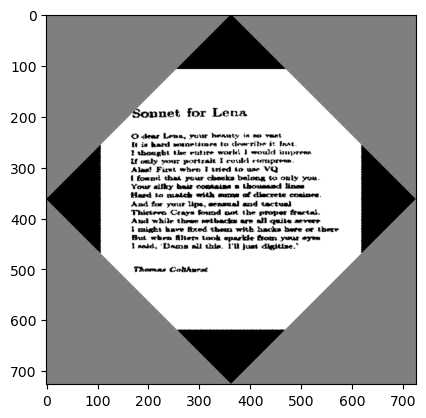

In [35]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below
def rectifyOrientation(I):
    ftson = computeFT(I)
    moduleftson = toVisualizeFT(ftson)
    result = thresholdImage(moduleftson, 3*10**(5)) 
    orientation = mainOrientation(result)
    rectified_image = rotateImage(I, -orientation[1])
    return rectified_image

plt.imshow(rectifyOrientation(sonrot))
plt.show


8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

C:\Users\conmy\AppData\Local\Temp\ipykernel_43776\3893800666.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Iori[i-1, j-1] = imax[0]


<function matplotlib.pyplot.show(close=None, block=None)>

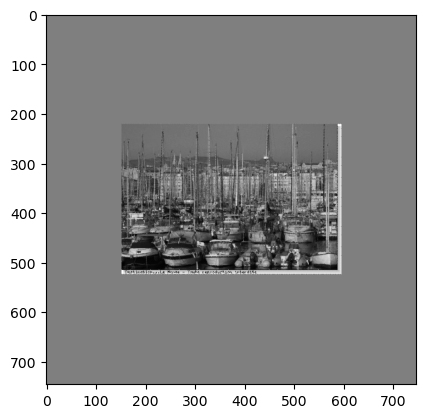

In [42]:
# experiment rectifyOrientation on sinrot
rectifyOrientation(sonrot)

# experiment on rotation of port
port = np.array(Image.open('img/port.jpg'))

plt.imshow(rectifyOrientation(rotateImage(port,45)))
plt.show